<a href="https://colab.research.google.com/github/teena496/Data-Analyst-Capstone-Project/blob/main/Lab_17_Bubble_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [ ]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [ ]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-04-22 17:07:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  56.7MB/s    in 2.7s    

2025-04-22 17:07:53 (56.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [ ]:
df['SOPartFreq'].unique()

array([nan, 'Multiple times per day', 'Daily or almost daily',
       'Less than once per month or monthly', 'A few times per week',
       'A few times per month or weekly',
       'I have never participated in Q&A on Stack Overflow'], dtype=object)

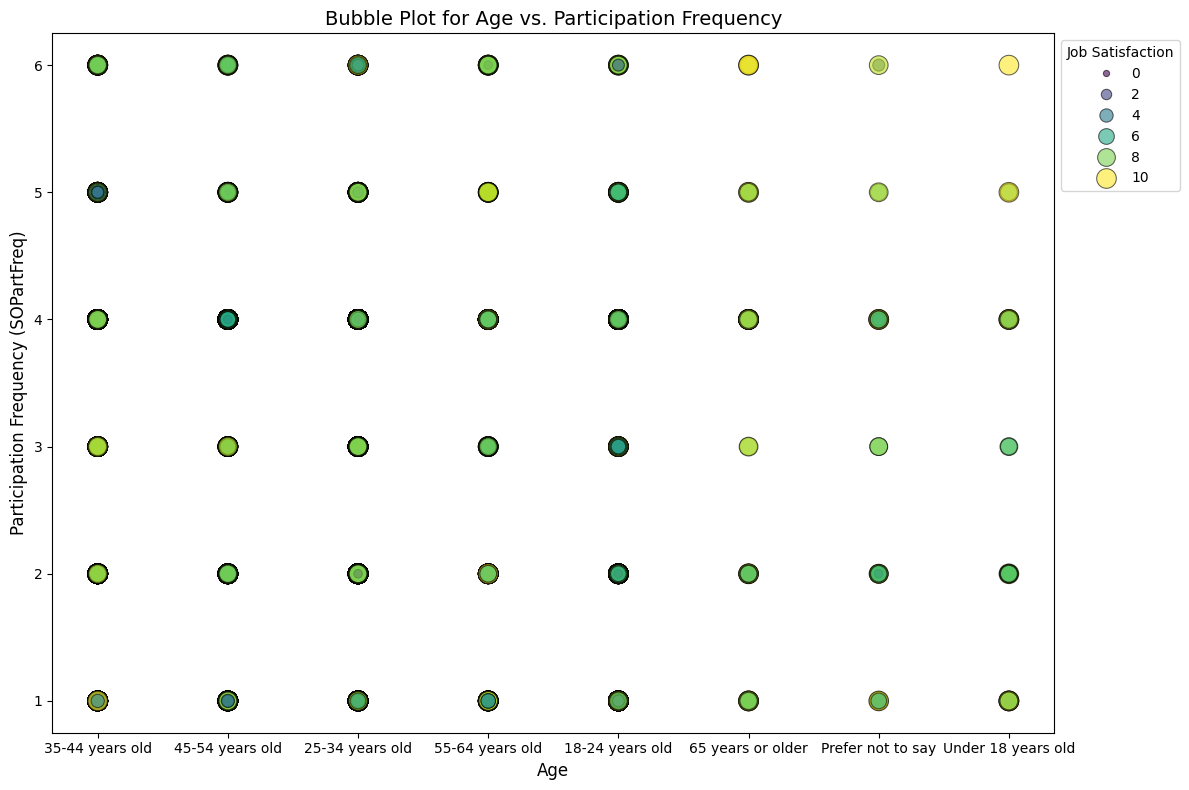

In [ ]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
# You may need to clean or map columns like SOPartFreq and JobSat
# Make sure SOPartFreq is categorical or numerical as required

# Example mappings for participation frequency and job satisfaction
# You can adjust this mapping as per your actual dataset values
sopart_freq_map = {
    'I have never participated in Q&A on Stack Overflow': 1,
    'A few times per month or weekly': 2,
    'A few times per week': 3,
    'Less than once per month or monthly': 4,
    'Daily or almost daily': 5,
    'Multiple times per day': 6

}

# Apply the mappings to the columns
df['SOPartFreq_num'] = df['SOPartFreq'].map(sopart_freq_map)

# Ensure that rows with missing or NaN values are dropped (optional)
df_clean = df.dropna(subset=['Age', 'SOPartFreq_num', 'JobSat'])

# Scatter plot to visualize the relationship
plt.figure(figsize=(12, 8))

# Bubble plot: x-axis = Age, y-axis = SOPartFreq (numerical), size of bubbles = JobSat
sns.scatterplot(data=df_clean,
                x='Age',                        # X-axis: Age
                y='SOPartFreq_num',              # Y-axis: Participation Frequency
                size='JobSat',               # Bubble size: Job satisfaction
                hue='JobSat',                # Optional: color by Job Satisfaction
                palette='viridis',               # Color palette
                sizes=(20, 200),                 # Range of bubble sizes
                alpha=0.6,                       # Transparency for better visibility
                edgecolor='black')               # Edges of bubbles for visibility

# Titles and labels
plt.title('Bubble Plot for Age vs. Participation Frequency', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Participation Frequency (SOPartFreq)', fontsize=12)

# Show legend
plt.legend(title='Job Satisfaction', loc='upper left', bbox_to_anchor=(1, 1))

# Tight layout for clean visualization
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [ ]:
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])
df_clean

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,SOPartFreq_num
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,4.0
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0,4.0
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,2.0
392,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media,NaN,...,5.0,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7.0,2.0
398,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41175,41176,I am a developer by profession,18-24 years old,"Student, full-time;Independent contractor, fre...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,25.0,5.0,15.0,10.0,5.0,Appropriate in length,Neither easy nor difficult,15637.0,6.0,3.0
41178,41179,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,Apples,Hobby,"Secondary school (e.g. American high school, G...",Books / Physical media;Colleague;On the job tr...,NaN,...,80.0,30.0,0.0,0.0,0.0,Too long,Neither easy nor difficult,9711.0,0.0,NaN
41184,41185,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books,...,10.0,20.0,15.0,0.0,0.0,Appropriate in length,Easy,170000.0,9.0,4.0
41186,41187,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Books;Written Tutorial...,...,25.0,15.0,5.0,5.0,0.0,Appropriate in length,Easy,12000.0,3.0,1.0


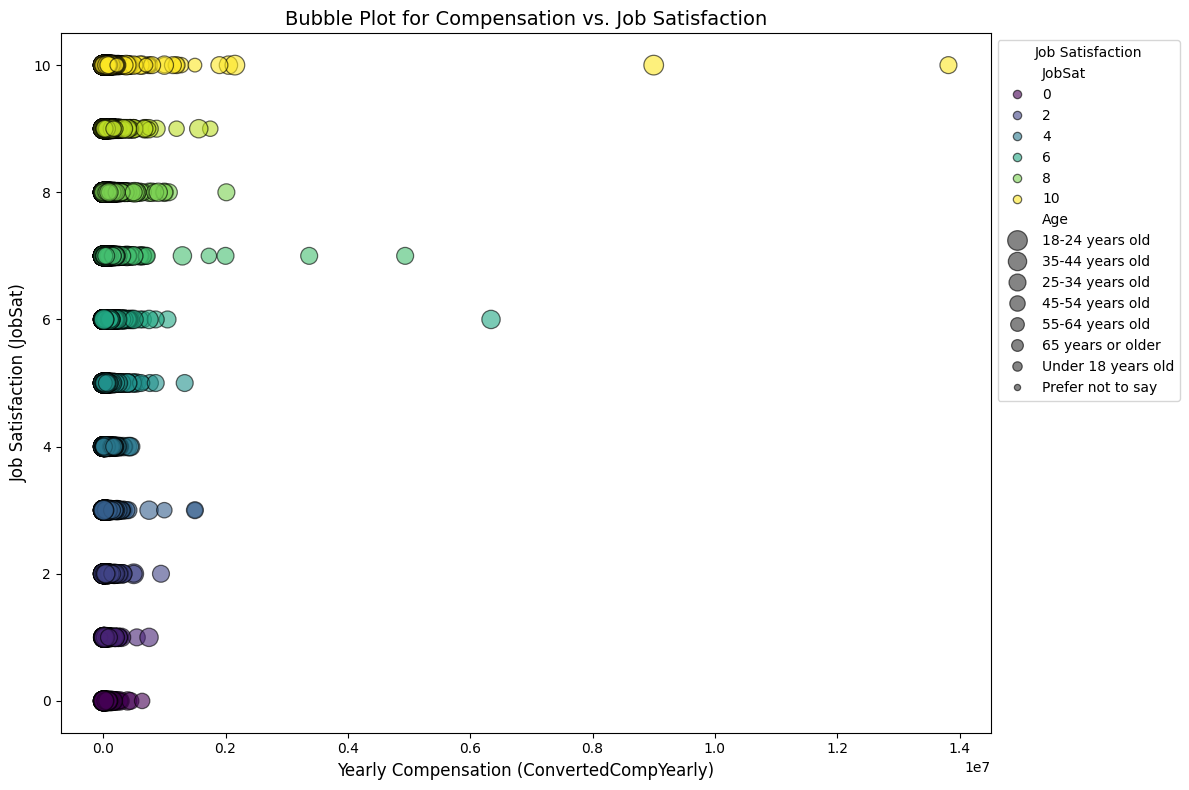

In [ ]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data


# Ensure there are no missing values in the necessary columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])

# Bubble plot: x-axis = ConvertedCompYearly, y-axis = JobSat_num, size of bubbles = Age
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_clean,
                x='ConvertedCompYearly',  # X-axis: Yearly Compensation
                y='JobSat',           # Y-axis: Job Satisfaction
                size='Age',               # Bubble size: Respondents' Age
                hue='JobSat',         # Optional: color by Job Satisfaction level
                palette='viridis',        # Color palette for the hues
                sizes=(20, 200),          # Size range for bubbles
                alpha=0.6,                # Transparency for bubble clarity
                edgecolor='black')        # Bubble edges for clarity

# Titles and labels
plt.title('Bubble Plot for Compensation vs. Job Satisfaction', fontsize=14)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSat)', fontsize=12)

# Show legend
plt.legend(title='Job Satisfaction', loc='upper left', bbox_to_anchor=(1, 1))

# Tight layout for better presentation
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [ ]:
df['LanguageHaveWorkedWith'].unique()

array([nan,
       'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript',
       'C#', ...,
       'Bash/Shell (all shells);C;C#;C++;Delphi;Groovy;HTML/CSS;Java;JavaScript;Objective-C;PowerShell;Python;SQL;Swift;TypeScript',
       'C;C++;Go;Lua;Objective-C;Python;Rust;SQL',
       'C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript'],
      shape=(23865,), dtype=object)

/tmp/ipykernel_6593/338428246.py:43: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df_cleaned['LanguageHaveWorkedWith'].str.contains(language))])


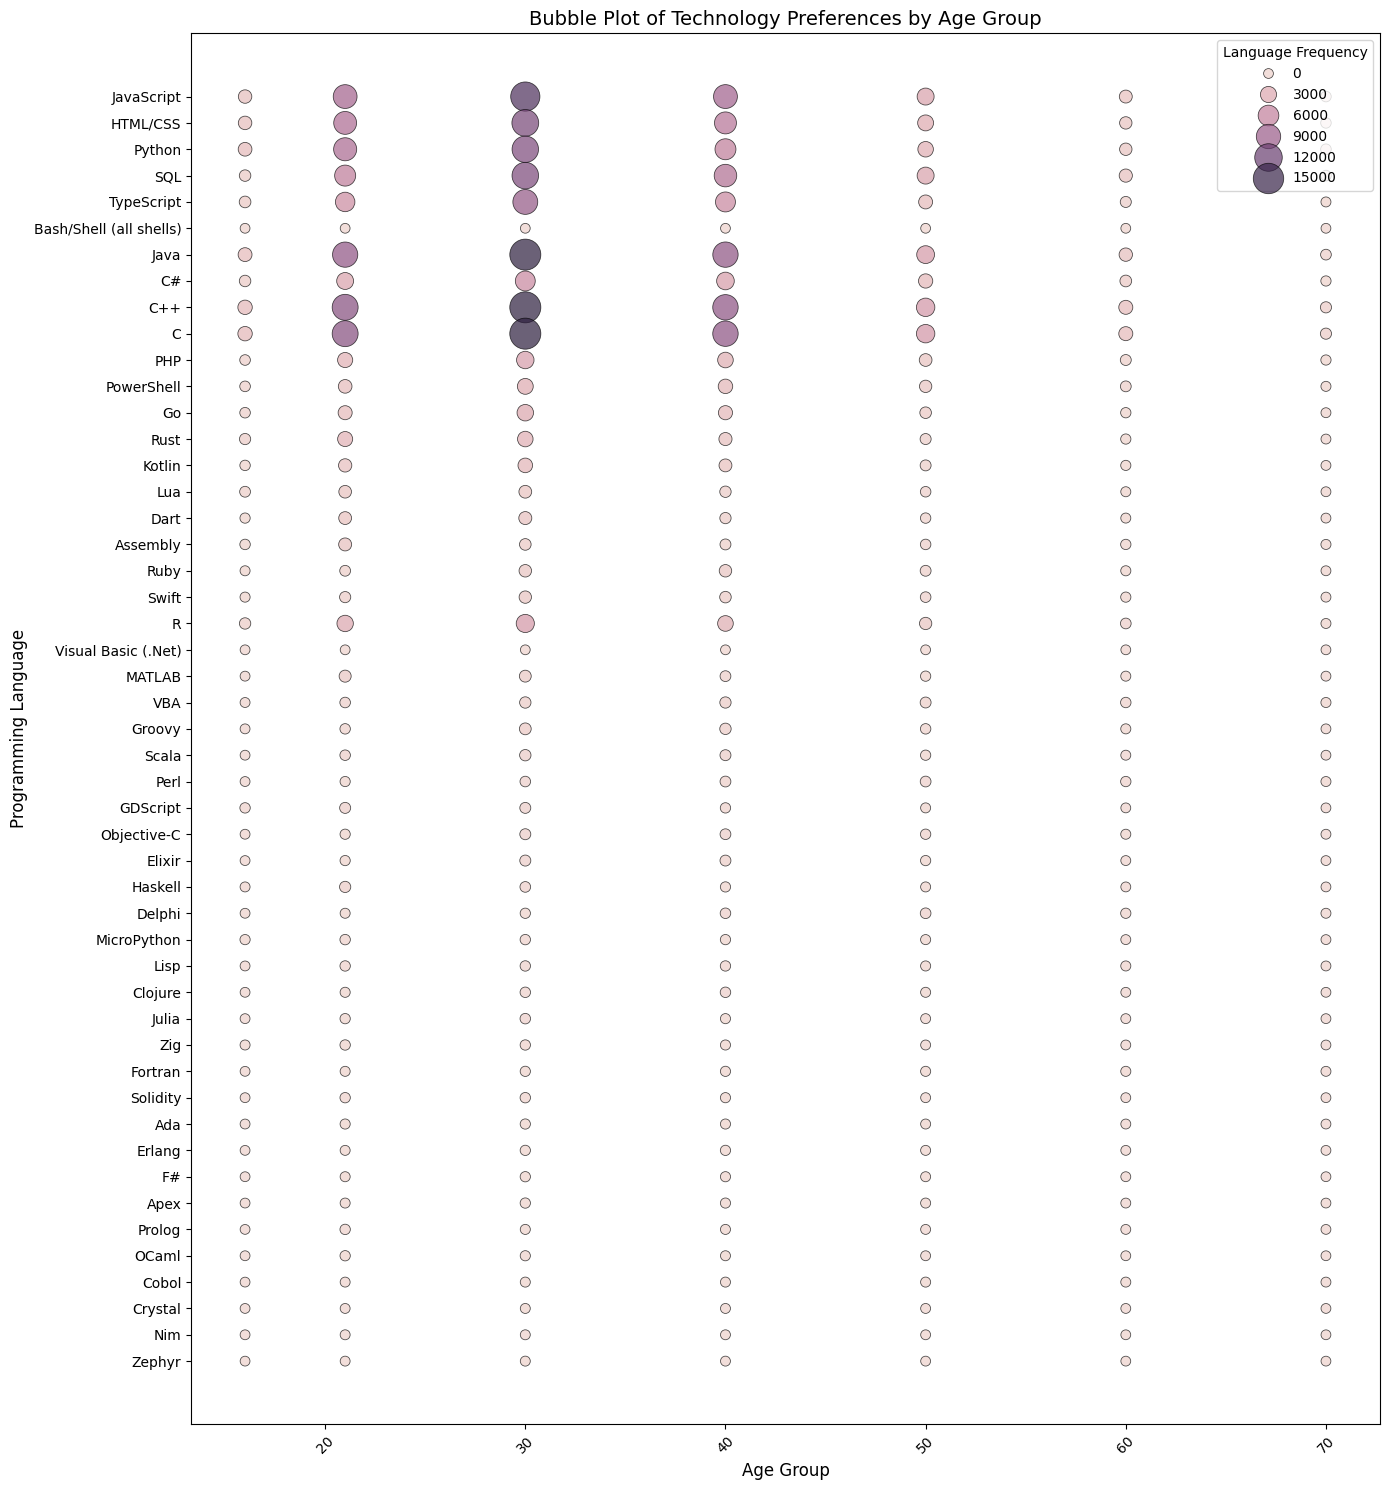

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
# Step 1: Split the languages in 'LanguageHaveWorkedWith' column by ';' and clean up any extra spaces
df['LanguageList'] = df['LanguageHaveWorkedWith'].dropna().str.split(';')

# Flatten the list of languages into a long format (one row per language per respondent)
languages_flat = [language.strip() for sublist in df['LanguageList'].dropna() for language in sublist]

# Create a new DataFrame for individual languages
languages_df = pd.DataFrame(languages_flat, columns=['Language'])

# Step 2: Count the frequency of each language
languages_count = languages_df['Language'].value_counts().reset_index()
languages_count.columns = ['Language', 'Frequency']

# Step 3: Map the 'Age' column to numeric values
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None  # Handle 'Prefer not to say' if needed
}

df['Age_numeric'] = df['Age'].map(age_map)

# Step 4: Remove rows where 'Age_numeric' is NaN (e.g., 'Prefer not to say')
df_cleaned = df.dropna(subset=['Age_numeric'])

# Step 5: Create a DataFrame that holds language frequencies per age group
language_age_group = []

# Loop through each language and calculate the frequency per age group
for language in languages_count['Language']:
    for age_group in df_cleaned['Age_numeric'].unique():
        count = len(df_cleaned[(df_cleaned['Age_numeric'] == age_group) &
                               (df_cleaned['LanguageHaveWorkedWith'].str.contains(language))])
        language_age_group.append({'Language': language, 'Age_group': age_group, 'Frequency': count})

# Step 6: Convert to DataFrame
language_age_group_df = pd.DataFrame(language_age_group)

# Step 7: Plot the Bubble Plot
plt.figure(figsize=(14, 15))

sns.scatterplot(data=language_age_group_df,
                x='Age_group',            # X-axis: Age group
                y='Language',             # Y-axis: Language
                size='Frequency',         # Size of bubbles: Frequency of each language
                hue='Frequency',          # Color by frequency of each language
                sizes=(50, 500),          # Bubble size range
                alpha=0.7,                # Transparency for bubbles
                edgecolor='black')        # Black edge around bubbles

# Title and Labels
plt.title('Bubble Plot of Technology Preferences by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Programming Language', fontsize=12)

# Optional: Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Optional: Show legend for frequency
plt.legend(title='Language Frequency', loc='upper right')

# Tight layout for better visualization
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


/tmp/ipykernel_6593/2494895346.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DatabaseList'] = df_cleaned['DatabaseWantToWorkWith'].str.split(';')


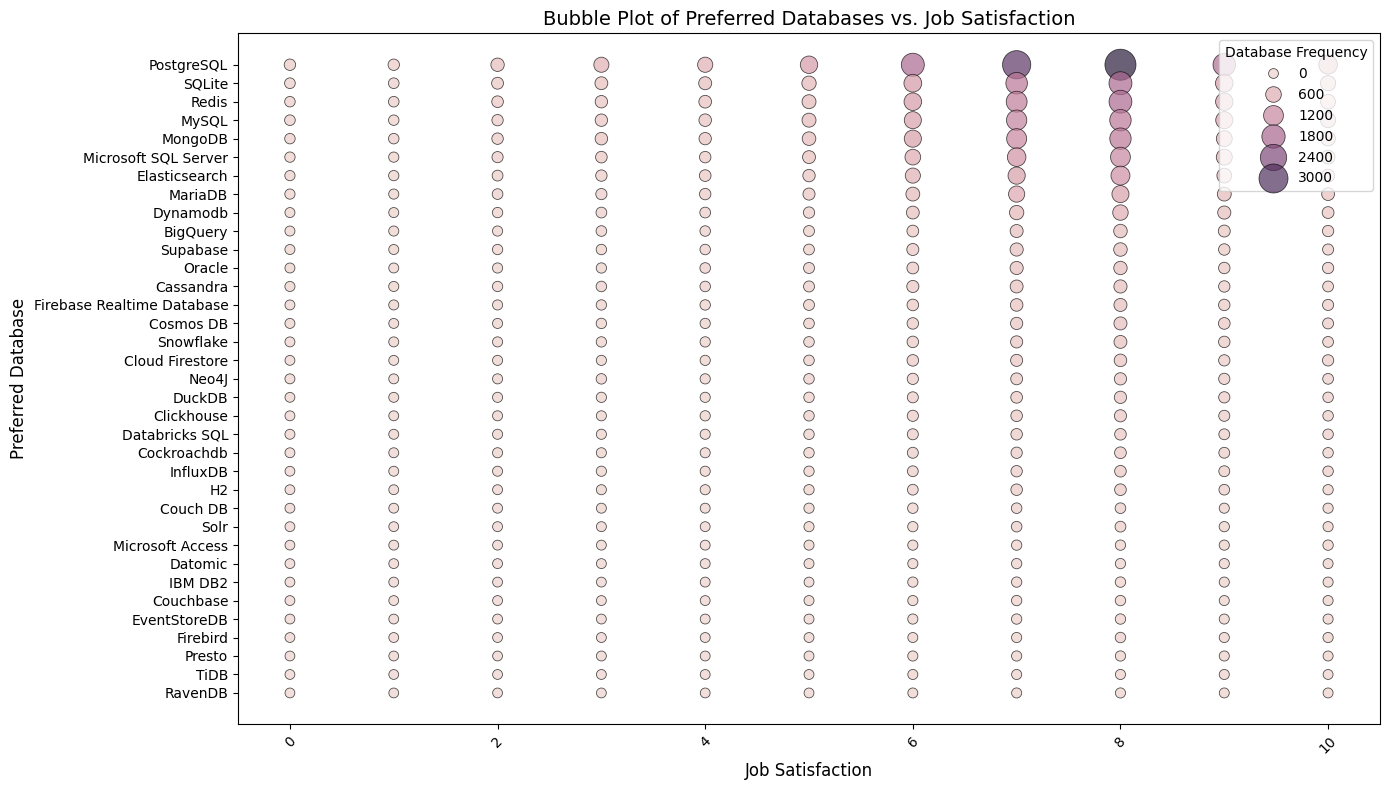

In [ ]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
# Step 1: Clean data by dropping rows with missing values in the relevant columns
df_cleaned = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

# Step 2: Split the 'DatabaseWantToWorkWith' column by semicolons and clean up
df_cleaned['DatabaseList'] = df_cleaned['DatabaseWantToWorkWith'].str.split(';')

# Step 3: Flatten the list of databases into a long format (one row per database per respondent)
databases_flat = [database.strip() for sublist in df_cleaned['DatabaseList'] for database in sublist]

# Step 4: Create a new DataFrame for individual databases
databases_df = pd.DataFrame(databases_flat, columns=['Database'])

# Step 5: Count the frequency of each database
databases_count = databases_df['Database'].value_counts().reset_index()
databases_count.columns = ['Database', 'Frequency']

# Step 6: Map the 'JobSat' column to numeric values (if it's not already)
# If JobSat is categorical, you can map it to numeric values (e.g., 1-5 scale or use the actual numbers)
# For this example, we'll assume it's already numeric

# Step 7: Create a DataFrame that holds job satisfaction and database frequencies
database_job_satisfaction = []

# Loop through each database and calculate the frequency per job satisfaction
for database in databases_count['Database']:
    for job_satisfaction in df_cleaned['JobSat'].unique():
        count = len(df_cleaned[(df_cleaned['JobSat'] == job_satisfaction) &
                               (df_cleaned['DatabaseWantToWorkWith'].str.contains(database))])
        database_job_satisfaction.append({'Database': database, 'JobSat': job_satisfaction, 'Frequency': count})

# Step 8: Convert to DataFrame
database_job_satisfaction_df = pd.DataFrame(database_job_satisfaction)

# Step 9: Plot the Bubble Plot
plt.figure(figsize=(14, 8))

sns.scatterplot(data=database_job_satisfaction_df,
                x='JobSat',              # X-axis: Job satisfaction
                y='Database',            # Y-axis: Database
                size='Frequency',        # Size of bubbles: Frequency of each database
                hue='Frequency',         # Color by frequency of each database
                sizes=(50, 500),         # Bubble size range
                alpha=0.7,               # Transparency for bubbles
                edgecolor='black')       # Black edge around bubbles

# Title and Labels
plt.title('Bubble Plot of Preferred Databases vs. Job Satisfaction', fontsize=14)
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Preferred Database', fontsize=12)

# Optional: Show legend for frequency
plt.legend(title='Database Frequency', loc='upper right')

# Optional: Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Tight layout for better visualization
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


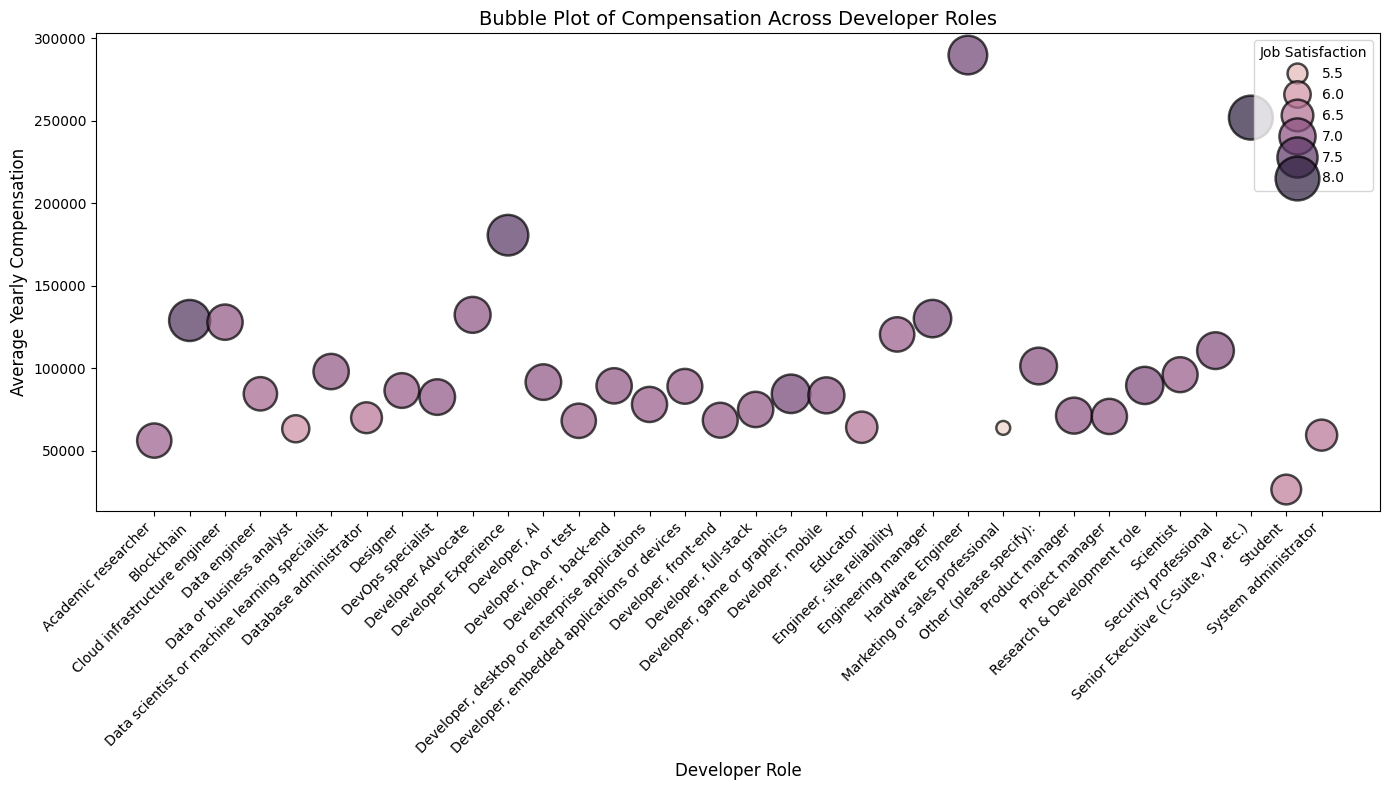

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
# Step 1: Clean data by dropping rows with missing values in the relevant columns
df_cleaned = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat'])

# Step 2: Calculate the average compensation by developer role
compensation_by_role = df_cleaned.groupby('DevType')['ConvertedCompYearly'].mean().reset_index()

# Step 3: Map job satisfaction values to the developer roles
job_satisfaction_by_role = []

for dev_type in compensation_by_role['DevType']:
    job_satisfaction = df_cleaned[df_cleaned['DevType'] == dev_type]['JobSat'].mean()  # Average JobSat for each role
    job_satisfaction_by_role.append(job_satisfaction)

compensation_by_role['JobSat'] = job_satisfaction_by_role

# Step 4: Plot the Bubble Plot
plt.figure(figsize=(14, 8))

sns.scatterplot(data=compensation_by_role,
                x='DevType',                # X-axis: Developer Role
                y='ConvertedCompYearly',    # Y-axis: Average Compensation
                size='JobSat',              # Size of bubbles: Job Satisfaction
                hue='JobSat',               # Color by Job Satisfaction
                sizes=(100, 1000),          # Bubble size range
                alpha=0.7,                 # Transparency for bubbles
                edgecolor='black')         # Black edge around bubbles

# Title and Labels
plt.title('Bubble Plot of Compensation Across Developer Roles', fontsize=14)
plt.xlabel('Developer Role', fontsize=12)
plt.ylabel('Average Yearly Compensation', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optional: Show legend for Job Satisfaction
plt.legend(title='Job Satisfaction', loc='upper right')

# Tight layout for better visualization
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


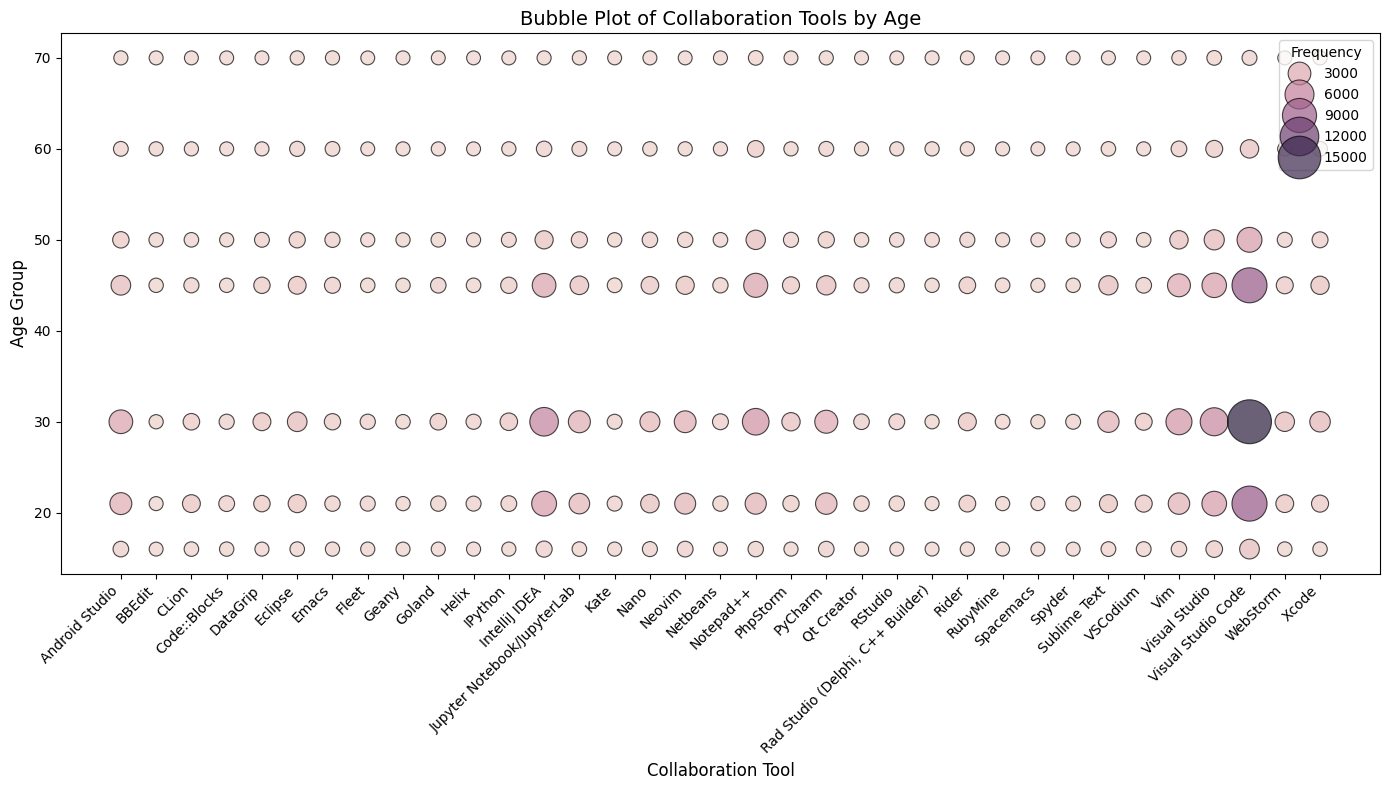

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data

# Step 1: Clean data by dropping rows with missing values in relevant columns
df_cleaned = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age'])

# Step 2: Define the age groups mapping
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 45,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Apply the mapping to convert 'Age' into numeric values using .loc to avoid setting with copy warning
df_cleaned.loc[:, 'Age_numeric'] = df_cleaned['Age'].map(age_map)

# Step 3: Split the tools used in the 'NEWCollabToolsHaveWorkedWith' column (it may contain multiple tools)
# We'll treat each tool as a separate entry in the tool usage analysis.
tools_used = df_cleaned['NEWCollabToolsHaveWorkedWith'].str.split(';', expand=True).stack()

# Flatten the MultiIndex so that we can align the data properly
tools_used = tools_used.reset_index(name='Tool')
tools_used = tools_used.drop(columns=['level_1'])

# Step 4: Correct the index handling - merge the 'Age_numeric' data using 'level_0'
tools_used['Age'] = df_cleaned.loc[tools_used['level_0'], 'Age_numeric'].values

# Step 5: Count frequency of tool usage by age group
tool_usage_by_age = tools_used.groupby(['Age', 'Tool']).size().reset_index(name='Frequency')

# Step 6: Plot the Bubble Plot
plt.figure(figsize=(14, 8))

sns.scatterplot(data=tool_usage_by_age,
                x='Tool',              # X-axis: Collaboration Tool
                y='Age',               # Y-axis: Age Group
                size='Frequency',      # Size of bubbles: Frequency of Tool Usage
                hue='Frequency',       # Color by frequency for better visualization
                sizes=(100, 1000),     # Bubble size range
                alpha=0.7,            # Transparency for bubbles
                edgecolor='black')    # Black edge around bubbles

# Title and Labels
plt.title('Bubble Plot of Collaboration Tools by Age', fontsize=14)
plt.xlabel('Collaboration Tool', fontsize=12)
plt.ylabel('Age Group', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optional: Show legend for Frequency
plt.legend(title='Frequency', loc='upper right')

# Tight layout for better visualization
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [ ]:
df['WebframeWantToWorkWith'].unique()

array([nan, 'Express;Htmx;Node.js;React;Remix', 'ASP.NET CORE', ...,
       'Deno;Express;Fastify;Flask;NestJS;Node.js',
       'ASP.NET;Laravel;React;Spring Boot',
       'Django;Express;Laravel;NestJS;Next.js;Node.js;Nuxt.js;React;Spring Boot;Symfony;Vue.js;WordPress'],
      shape=(11655,), dtype=object)

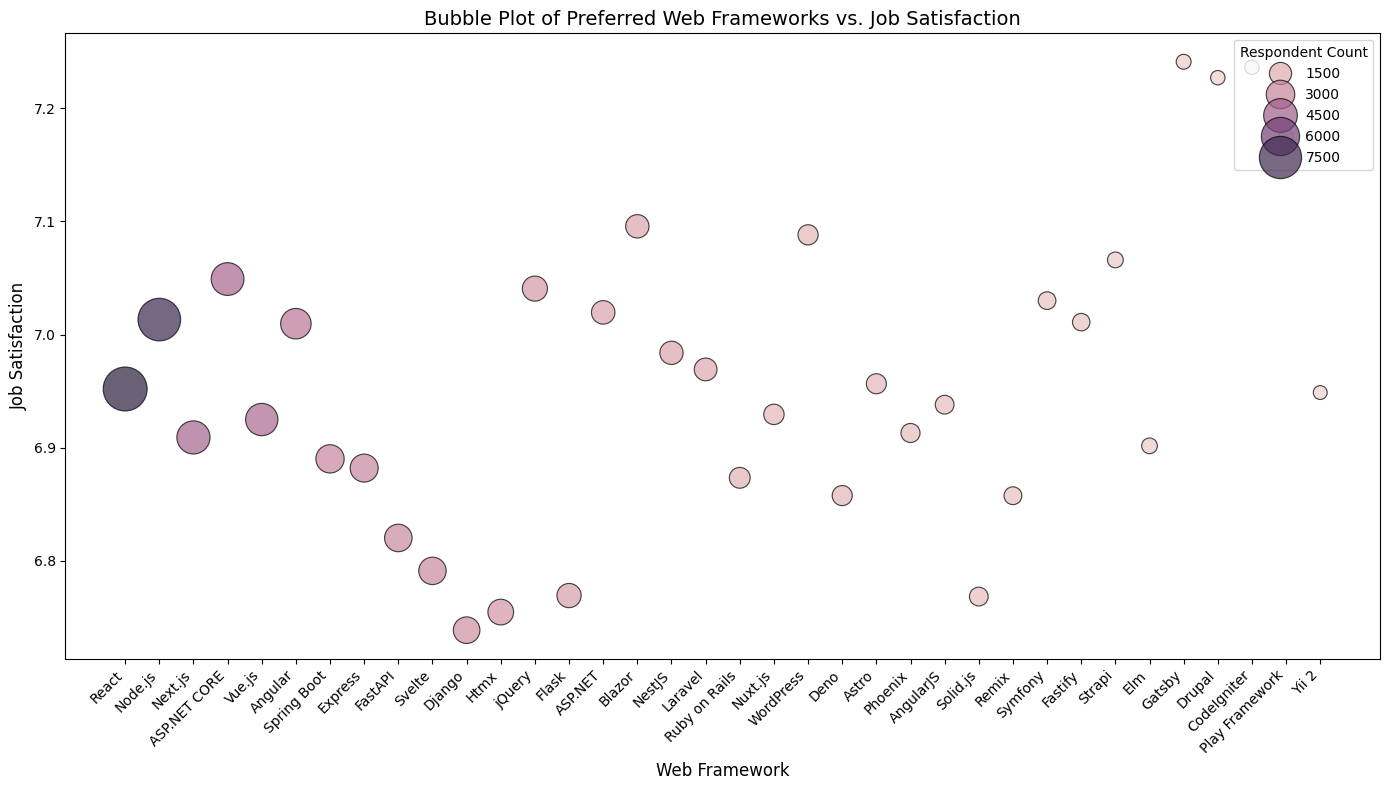

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame
# Step 1: Clean data by dropping rows with missing values in relevant columns
df_cleaned = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Step 2: Split the semicolon-separated list of frameworks into individual rows
# Exploding 'WebframeWantToWorkWith' to create a row for each framework
df_cleaned_exploded = df_cleaned.assign(WebframeWantToWorkWith=df_cleaned['WebframeWantToWorkWith'].str.split(';')).explode('WebframeWantToWorkWith')

# Step 3: Count the number of respondents for each web framework
framework_count = df_cleaned_exploded['WebframeWantToWorkWith'].value_counts().reset_index()
framework_count.columns = ['WebFramework', 'RespondentCount']

# Step 4: Calculate the average job satisfaction for each framework
avg_job_satisfaction = df_cleaned_exploded.groupby('WebframeWantToWorkWith')['JobSat'].mean().reset_index()
framework_count = pd.merge(framework_count, avg_job_satisfaction, left_on='WebFramework', right_on='WebframeWantToWorkWith', how='left')

# Step 5: Create the Bubble Plot
plt.figure(figsize=(14, 8))

sns.scatterplot(data=framework_count,
                x='WebFramework',       # X-axis: Web Frameworks
                y='JobSat',             # Y-axis: Job Satisfaction
                size='RespondentCount', # Size of bubbles: Respondent Count
                hue='RespondentCount',  # Color by Respondent Count for better visualization
                sizes=(100, 1000),      # Bubble size range
                alpha=0.7,             # Transparency for bubbles
                edgecolor='black')     # Black edge around bubbles

# Title and Labels
plt.title('Bubble Plot of Preferred Web Frameworks vs. Job Satisfaction', fontsize=14)
plt.xlabel('Web Framework', fontsize=12)
plt.ylabel('Job Satisfaction', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optional: Show legend for Respondent Count
plt.legend(title='Respondent Count', loc='upper right')

# Tight layout for better visualization
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



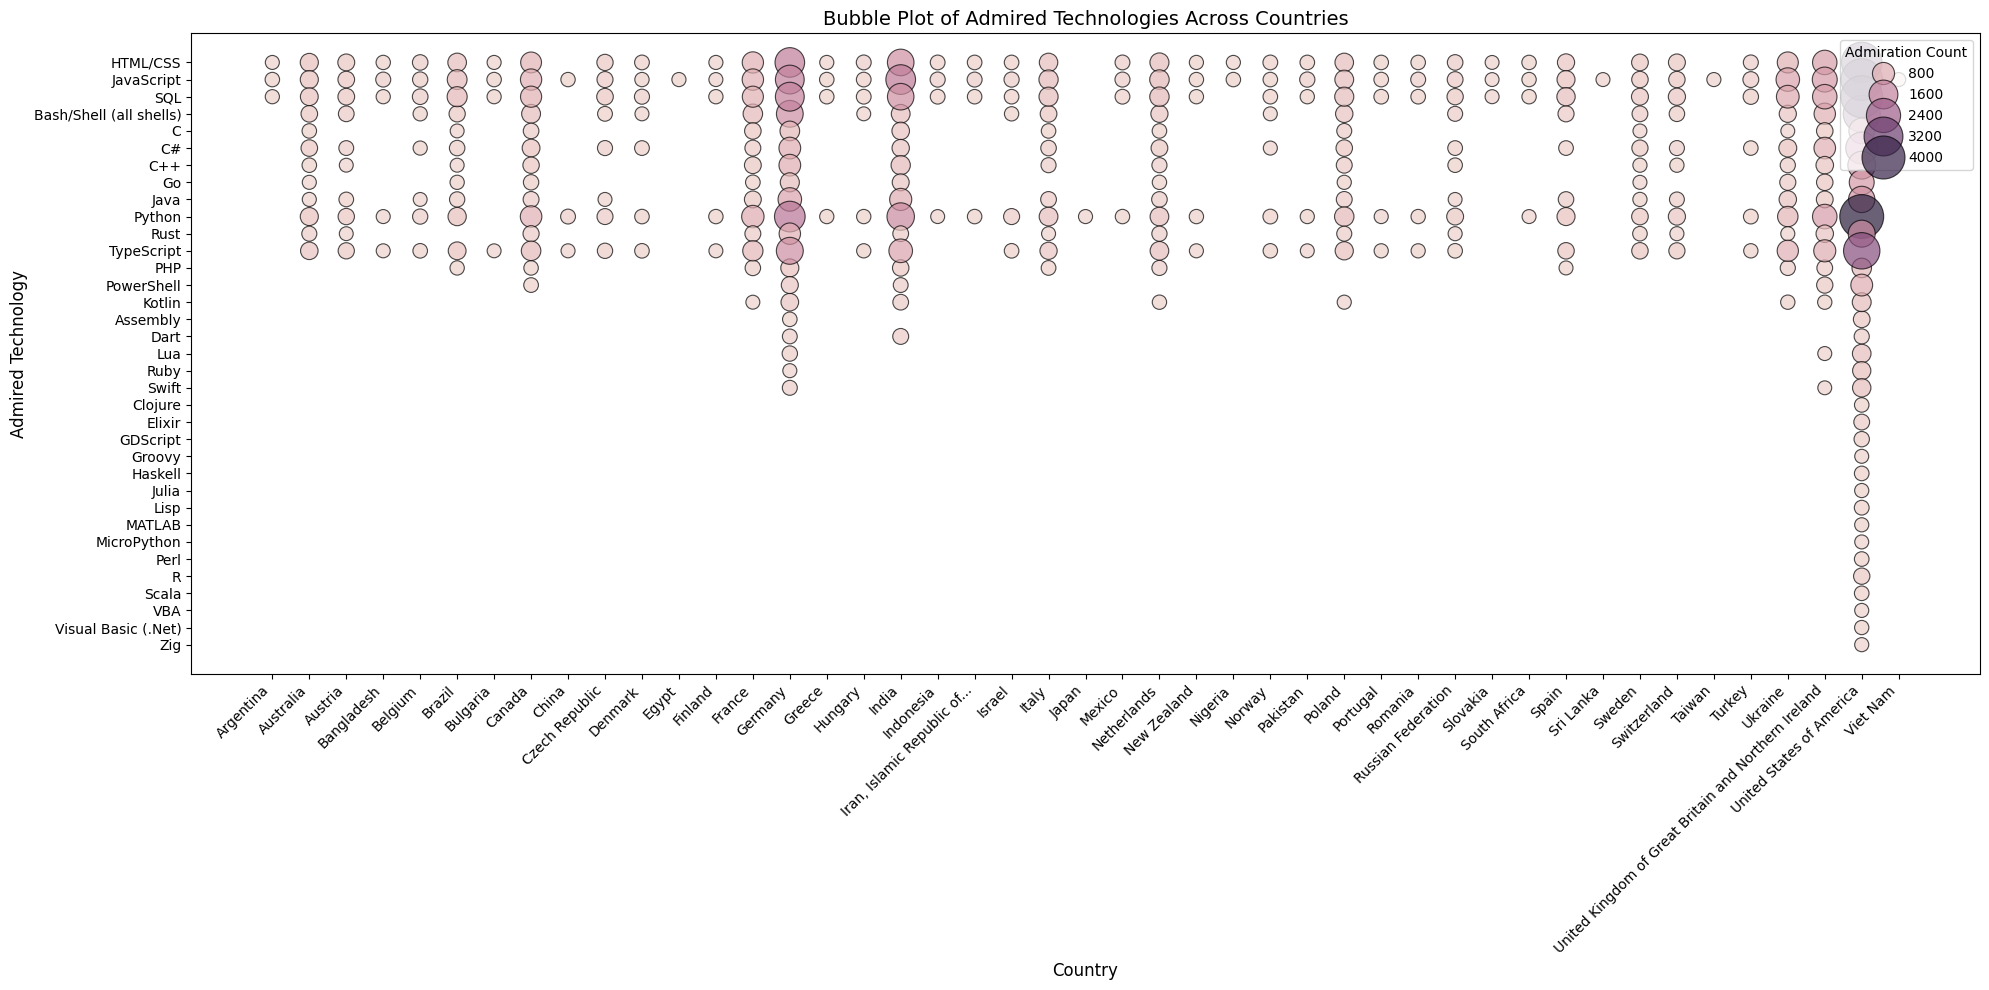

In [ ]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame
# Step 1: Clean data by dropping rows with missing values in 'LanguageAdmired' and 'Country'
df_cleaned = df.dropna(subset=['LanguageAdmired', 'Country'])

# Step 2: Split the semicolon-separated list of admired technologies into individual rows
df_cleaned_exploded = df_cleaned.assign(LanguageAdmired=df_cleaned['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Step 3: Count the number of admirations per technology by country
admired_technologies = df_cleaned_exploded.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='AdmirationCount')
plot_data = admired_technologies[admired_technologies['AdmirationCount'] > 100]
plot_data
# Step 4: Create the Bubble Plot
plt.figure(figsize=(20, 10))

sns.scatterplot(data=plot_data,
                x='Country',              # X-axis: Countries
                y='LanguageAdmired',     # Y-axis: Admired Technologies
                size='AdmirationCount',  # Size of bubbles: Admiration Count
                hue='AdmirationCount',   # Color by Admiration Count
                sizes=(100, 1000),       # Bubble size range
                alpha=0.7,              # Transparency for bubbles
                edgecolor='black')      # Black edge around bubbles

# Title and Labels
plt.title('Bubble Plot of Admired Technologies Across Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Admired Technology', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optional: Show legend for Admiration Count
plt.legend(title='Admiration Count', loc='upper right')

# Tight layout for better visualization
plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
